#**Linear Regression & Error Metrics**


In this notebook, we will explore **Linear Regression** and how to implement it from first principles.
You will learn:
- How to manually draw or generate a dataset
- How to perform a **from-scratch** implementation of linear regression using both gradient descent and the normal equation
- How to compute various **regression error metrics** (MSE, MAE, RMSE, etc.) to evaluate your model’s performance
- How to compare your custom implementation to a conventional library-based approach

---
##📚 **High Level Workflow**

1. **Data Acquisition/Creation**: Draw or gather a set of \((x, y)\) points interactively.
2. **Data Visualization & Preprocessing**: Plot the points, drop unnecessary columns, normalize features.
3. **Model Initialization**: Randomly assign initial parameters for a linear model.
4. **Forward Pass & Error Metrics**: Calculate predictions and observe errors (MSE, MAE, RMSE, etc.).
5. **Gradient Descent**: Update parameters iteratively to minimize the chosen error metric.
6. **Comparison**: Visualize how the learned model differs from the initial one.
7. **Alternative Approach (Normal Equation)**: Implement a linear regression class that uses the normal equation for a closed-form solution.
8. **Evaluation**: Compare both methods, consider pros/cons, and compute final error metrics.

---
## 🔗 **Libraries Overview**

- **drawdata**: A library providing an interactive widget to draw custom 2D data points directly in the notebook.  
  **Official repo**: [drawdata GitHub](https://github.com/ashutoshbondre/drawdata)
  
- **pandas**: For handling our dataset in a tabular format, and to easily drop columns, calculate statistics, etc.  
  **Official docs**: [pandas.pydata.org](https://pandas.pydata.org/)

- **numpy**: The foundational library for numerical operations in Python (mean, std, array manipulations, etc.).  
  **Official docs**: [numpy.org](https://numpy.org/)

- **matplotlib**: Used for data visualization. In particular, we’re using `pyplot` for scatter plots and line plots.  
  **Official docs**: [matplotlib.org](https://matplotlib.org/)
  
- **random**: Python’s built-in library for generating random numbers. Here, we use it to initialize parameters randomly.

---
## **Dataset Description & Preprocessing**

We use the interactive `drawdata` widget to generate a custom dataset of points \((x, y)\). After drawing, we remove extra columns (such as `color` or `label`) that aren’t needed for numerical calculations.

Normalization (standard scaling) is often performed to:
1. Put all features on a similar scale, helping algorithms like gradient descent converge faster.
2. Avoid biasing the model toward features with large scales.



# **Create data points**

In [1]:
!pip install drawdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.8/234.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.5/765.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.7 MB/s eta 0:00:00


**Explanation**  
We first install the `drawdata` library, which allows us to interactively draw data points and retrieve them as a DataFrame for further analysis.


In [2]:
from drawdata import ScatterWidget

widget = ScatterWidget()
widget

ScatterWidget()

**Explanation**  
Here we import the `ScatterWidget` from `drawdata`. This widget lets us draw points in a notebook cell. We instantiate the widget, which appears as an interactive interface for drawing when run in a Jupyter environment.


# **Visualize the data**

In [3]:
# Get the drawn data as a list of dictionaries
data_dictionary = widget.data

# Get the drawn data as a dataframe
pandas_dataset = widget.data_as_pandas

**Explanation**  
After drawing points in the widget, we can retrieve the data as either a list of dictionaries (`widget.data`) or as a pandas DataFrame (`widget.data_as_pandas`). This lets us work with the drawn data programmatically.


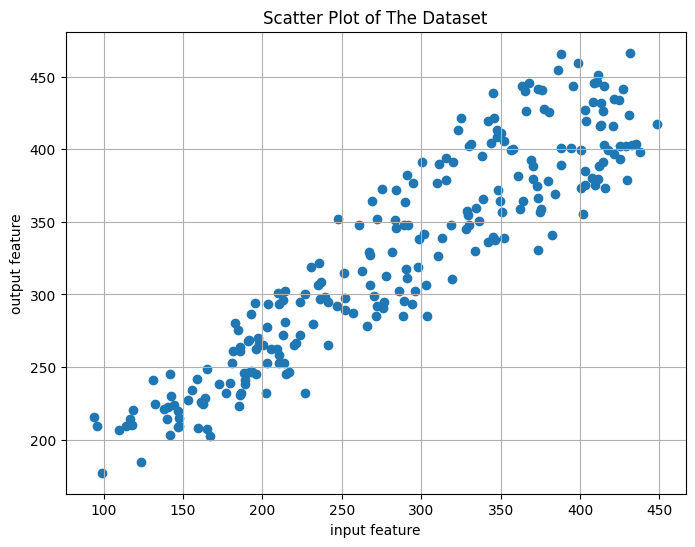

In [4]:
import matplotlib.pyplot as plt

# Assuming 'x' and 'y' are the column names in your pandas_dataset
x = pandas_dataset['x']
y = pandas_dataset['y']

plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('input feature')
plt.ylabel('output feature')
plt.title('Scatter Plot of The Dataset')
plt.grid(True)
plt.show()


**Explanation**  
We load `matplotlib.pyplot` for plotting and extract the `x` and `y` columns from `pandas_dataset`. Then, we create a scatter plot to visualize the points we drew.

Since we are dealing with a regression task, we will consider that y is the output label and x is the input feature

In [5]:
pandas_dataset.drop(columns=['color', 'label'], inplace=True)

In [6]:
pandas_dataset

,x,y
0,179.336140,238.878748
1,184.705277,275.822889
2,181.683169,260.871847
3,200.458123,264.955824
4,223.540499,294.859376
...,...,...
237,93.792346,215.652974
238,116.864499,213.989061
239,98.818824,177.271417
240,123.442009,184.834693


**Explanation**  
The widget’s DataFrame may have additional columns like `color` and `label`. We remove them because they are not needed for our regression task.


# **Linear regression**

## **Pre-processing**

In [7]:
import numpy as np
x = pandas_dataset['x']
y = pandas_dataset['y']

# normalize the input feature
x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

**Explanation**  
We import NumPy for numerical operations. We separate out the `x` and `y` columns again (though we already did above, this reaffirms it). We compute the mean and standard deviation of `x` and create a normalized version:

$$
x_{\text{normalized}} = \frac{x - \bar{x}}{\sigma_x}
$$

This step helps stabilize and speed up gradient descent.


In [11]:
import random
initial_a0 = random.randint(-500, 500)
initial_a1 = random.randint(-500, 500)
print(f"initial_a0: {initial_a0}, initial_a1: {initial_a1}")

initial_a0: -427, initial_a1: -70


**Explanation**  
We use Python’s `random` module to pick random initial values for our linear regression parameters (the intercept `a0` and the slope `a1`).


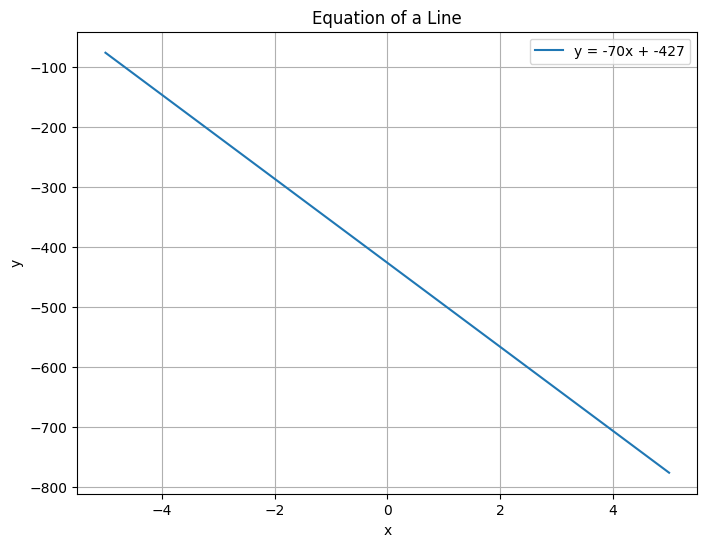

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values for the line
x = np.linspace(-5, 5, 100)  # Create 100 evenly spaced points between -5 and 5

# Calculate the corresponding y values using the equation of a line: y = mx + c
y = initial_a1 * x + initial_a0

# Plot the line
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'y = {initial_a1}x + {initial_a0}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Equation of a Line')
plt.grid(True)
plt.legend()
plt.show()

**Explanation**  
Using the initial parameters `initial_a0` (intercept) and `initial_a1` (slope), we generate a line across a range of x-values and plot it. This visualizes our starting guess for the linear model.


# **Error Functions**

## **Mean Bias Error**

In [13]:
# Lets run the first data point in our dataset through our initialized linear regression model and check the MBE
first_data_point = x_normalized[0]
label = pandas_dataset['y'][0]

print(f"first_data_point: {first_data_point}, label: {label}")

first_data_point: -1.1199117774625271, label: 238.87874767235428


**Explanation**  
We take the very first data point (in normalized form) and its corresponding label to see how far off our initial guess might be.


In [14]:
# Calculate the prediction for the first data point
prediction = initial_a1 * first_data_point + initial_a0
print(f"prediction: {prediction}")

prediction: -348.6061755776231


**Explanation**  
Using our initial slope (`initial_a1`) and intercept (`initial_a0`), we predict the output for the first data point. This is a manual forward pass of the linear model.


In [15]:
# Calculate the mean bias error for the single point
mean_bias_error = label - prediction
print(f"mean_bias_error: {mean_bias_error}")

mean_bias_error: 587.4849232499773


**Explanation**  
**Mean Bias Error (MBE)** for a single point is simply the difference between the true label and the predicted value. For multiple points, we would average this difference, but here we show it on a single data point.


## **Mean Squared Error**

In [16]:
mean_squared_error = (label - prediction) ** 2
print(f"mean_squared_error: {mean_squared_error}")

mean_squared_error: 345138.53504603176


**Explanation**  
The **Mean Squared Error (MSE)** is $(y - \hat{y})^2$. For a single data point, it’s the squared difference. Typically, MSE is averaged over all points, but here we illustrate it on just one.


## **Mean Absolute Error**

In [17]:
mean_absolute_error = abs(label - prediction)
print(f"mean_absolute_error: {mean_absolute_error}")

mean_absolute_error: 587.4849232499773


**Explanation**  
**MAE** is $| y - \hat{y} |$. It’s another common metric to measure how far off predictions are, on average, in absolute terms.


## **Root mean squared error**

In [18]:
root_mean_squared_error = np.sqrt(mean_squared_error)
print(f"root_mean_squared_error: {root_mean_squared_error}")

root_mean_squared_error: 587.4849232499773


**Explanation**  
We take the square root of the MSE to get the **Root Mean Squared Error (RMSE)**, which is often more interpretable since it’s in the same units as the target variable.


## **Huber Loss**

In [19]:
delta = 1.0
error = np.abs(label - prediction)
print(f"Error: {error}")

# When error is below delta, use quadratic loss; otherwise linear
quadratic_loss = 0.5 * error**2
linear_loss = delta * (error - 0.5 * delta)

# Apply piecewise condition
huber_loss_value = np.where(error <= delta, quadratic_loss, linear_loss)
print(f"huber_loss: {huber_loss_value}")


Error: 587.4849232499773
huber_loss: 586.9849232499773


**Explanation**  
**Huber loss** is a robust loss function that is less sensitive to outliers than MSE. It uses a piecewise definition controlled by `delta`.  

$$
\text{Huber}(y, \hat{y}) =
\begin{cases}
0.5 (y - \hat{y})^2 & \text{if } |y - \hat{y}| \leq \delta \\
\delta (|y - \hat{y}| - 0.5 \delta) & \text{otherwise}
\end{cases}
$$


## **Mean Logarithmic Error**

In [20]:
mean_logarithmic_error = np.mean(np.log(np.abs(label - prediction)))
print(f"mean_logarithmic_error: {mean_logarithmic_error}")

mean_logarithmic_error: 6.375850583135795


**Explanation**  
We show a mean logarithmic error by applying a log transform to the absolute error. This is not a standard metric in some contexts, but it can be useful in certain applications (e.g., when dealing with relative errors).


# **Gradient descent**

In [21]:
def gradient_descent(x, y, learning_rate, nb_iterations, initial_a0, initial_a1):
    n = x.shape[0]  # Number of data points
    a0 = initial_a0
    a1 = initial_a1

    # Normalize x within the function (could also pass normalized data directly)
    x_mean = np.mean(x)
    x_std = np.std(x)
    x_normalized = (x - x_mean) / x_std

    for i in range(nb_iterations):
        # Predicted values with current parameters
        y_pred = a1 * x_normalized + a0

        # Calculate gradients of MSE w.r.t. a0 and a1
        a0_der = -2 * np.sum(y - y_pred) / n
        a1_der = -2 * np.sum(x_normalized * (y - y_pred)) / n

        # Update parameters
        a0 = a0 - learning_rate * a0_der
        a1 = a1 - learning_rate * a1_der

    return a0, a1


**Explanation**  
We define a function `gradient_descent` that takes in:  
- Arrays `x` and `y`  
- `learning_rate` (alpha)  
- `nb_iterations` (number of gradient descent steps)  
- Initial parameters `initial_a0` and `initial_a1`  

It normalizes `x` internally, computes partial derivatives of the loss (MSE), and updates `a0` and `a1` iteratively.


In [25]:
learning_rate = 0.001
nb_iterations = 100000

a0, a1 = gradient_descent(x, y, learning_rate, nb_iterations, initial_a0, initial_a1)

# Print out the final equation of the line after gradient descent
print("Equation is: y =", a0, "+", a1, "x")


Equation is: y = -427.0 + -204.10352558994728 x


**Explanation**  
We set the learning rate and the number of iterations, then call our `gradient_descent` function with the initial parameters. The function returns the optimized intercept (`a0`) and slope (`a1`).


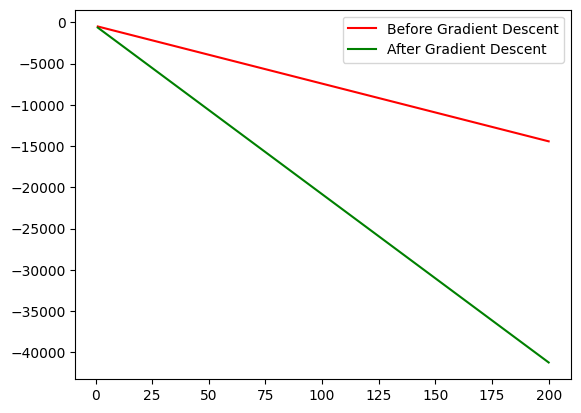

In [26]:
x_axis = np.arange(1, 200, 0.01)

# Predictions with the initial parameters
y_initial = initial_a0 + initial_a1 * x_axis

# Predictions after gradient descent
y_final = a0 + a1 * x_axis

# Plot the two lines
plt.plot(x_axis, y_initial, 'r', label='Before Gradient Descent')
plt.plot(x_axis, y_final, 'g', label='After Gradient Descent')
plt.legend()
plt.show()


**Explanation**  
We plot the line with initial parameters (in red) and the optimized line (in green) to visualize how gradient descent shifted our guess closer to an optimal solution.


# **Full Linear Regression Implementation**

In [27]:
import numpy as np

class LinearRegressionFromScratch:
    def __init__(self):
        self.weights = None  # To store the weights (including bias)

    def fit(self, X, y):
        """
        Fit the linear regression model to the training data using matrix multiplication.

        Args:
        X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).
        y (numpy.ndarray): Target vector of shape (n_samples,).
        """
        # Add a bias term (column of ones) to X
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]

        # Compute the weights using the normal equation: (X^T X)^(-1) X^T y
        self.weights = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

    def predict(self, X):
        """
        Predict using the linear regression model.

        Args:
        X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).

        Returns:
        numpy.ndarray: Predictions of shape (n_samples,).
        """
        # Add a bias term (column of ones) to X
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]

        # Predict using the learned weights
        return X_bias @ self.weights

# Example Usage
if __name__ == "__main__":
    # Generate synthetic data for testing
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
    y = 4 + 3 * X[:, 0] + np.random.randn(100)  # Linear relationship with noise

    # Initialize and train the model
    model = LinearRegressionFromScratch()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Print the weights (intercept and slope)
    print("Weights (including bias):", model.weights)

    # Optional: Evaluate the model using Mean Squared Error
    mse = np.mean((y - y_pred) ** 2)
    print("Mean Squared Error:", mse)


Weights (including bias): [4.21509616 2.77011339]
Mean Squared Error: 0.8065845639670534


**Explanation**  
In this cell, we implement a simple linear regression class using the **Normal Equation** approach:  

$$
\mathbf{w} = (X^T X)^{-1} X^T y
$$

- `fit()` adds a bias column and computes the weights.  
- `predict()` generates predictions given new input data.  

At the bottom is an example usage block (wrapped in `if __name__ == "__main__":`) to demonstrate creating synthetic data, fitting the model, and evaluating MSE.


# 📚**Additional Readings & Resources**

Below are some helpful resources to deepen your understanding of Linear Regression and related concepts:

1. **Andrew Ng’s Machine Learning (Coursera)**  
   - A seminal course that covers Linear Regression (with gradient descent) and many other fundamental ML techniques.  
   - [Link](https://www.coursera.org/learn/machine-learning)

2. **scikit-learn Documentation**  
   - Official documentation explaining how Linear Regression is implemented in a widely used Python library.  
   - [Link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

3. **Hands-On Machine Learning with Scikit-Learn & TensorFlow**  
   - By Aurélien Géron. A highly recommended book with practical code examples and deeper explanations of regression.  
   - Available from O’Reilly and other publishers.

4. **Kaggle Notebooks**  
   - [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/notebooks): Contains numerous public kernels illustrating linear regression for real-estate pricing.  
   - [Boston Housing Dataset](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/notebooks): A classic dataset frequently used to demonstrate linear regression.

5. **Introduction to Statistical Learning**  
   - By James, Witten, Hastie, Tibshirani. Offers a thorough theoretical foundation on regression and other statistical models.  
   - [Free PDF](https://www.statlearning.com/) available on the book’s website.

Feel free to explore these resources to gain both theoretical insights and practical skills in implementing and evaluating linear regression models.
